In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data

import torchvision.models as models
from collections import OrderedDict

import time
import pickle
import pandas
import numpy as np # to handle matrix and data operation
import matplotlib.pyplot as plt   #image visualisation
import scipy.stats as st


import W2reg_core as W2Rcore
import W2reg_misc as W2Rmisc


**Load pre-treated MNIST data.** 

The treatments make the predictions $y$ biased with respect to the variable $S$ (see the JMIV 2022 paper). 

In [2]:

[X_train,y_train,S_train,X_test,y_test,S_test]=W2Rmisc.Get_n_Treat_MNIST_srt()

#for i in range(0,5):
#  W2Rmisc.show_MNIST_image(i,X_train,y_train,S_train)


**Training phase with or without the W2 regulatization.**

Run training - without reg
epoch 0 -- batchNb 1: 0.25732642 0.0 --  lambda=0.0
epoch 0 -- batchNb 2: 0.2637535 0.0 --  lambda=0.0
epoch 0 -- batchNb 3: 0.2347878 0.0 --  lambda=0.0
epoch 0 -- batchNb 4: 0.2384815 0.0 --  lambda=0.0
epoch 0 -- batchNb 5: 0.23012476 0.0 --  lambda=0.0
epoch 0 -- batchNb 6: 0.23376898 0.0 --  lambda=0.0
epoch 0 -- batchNb 7: 0.23227471 0.0 --  lambda=0.0
epoch 0 -- batchNb 8: 0.23017657 0.0 --  lambda=0.0
epoch 0 -- batchNb 9: 0.22256331 0.0 --  lambda=0.0
epoch 0 -- batchNb 10: 0.21068396 0.0 --  lambda=0.0
epoch 0 -- batchNb 11: 0.21843684 0.0 --  lambda=0.0
epoch 0 -- batchNb 12: 0.21209425 0.0 --  lambda=0.0
epoch 0 -- batchNb 13: 0.19899742 0.0 --  lambda=0.0
epoch 0 -- batchNb 14: 0.19173332 0.0 --  lambda=0.0
epoch 0 -- batchNb 15: 0.2054181 0.0 --  lambda=0.0
epoch 0 -- batchNb 16: 0.21150465 0.0 --  lambda=0.0
epoch 0 -- batchNb 17: 0.1926195 0.0 --  lambda=0.0
epoch 0 -- batchNb 18: 0.1798497 0.0 --  lambda=0.0
epoch 0 -- batchNb 19: 0.17960475 

epoch 0 -- batchNb 154: 0.033278547 0.0 --  lambda=0.0
epoch 0 -- batchNb 155: 0.05912313 0.0 --  lambda=0.0
epoch 0 -- batchNb 156: 0.039104097 0.0 --  lambda=0.0
epoch 0 -- batchNb 157: 0.051069375 0.0 --  lambda=0.0
epoch 0 -- batchNb 158: 0.03350595 0.0 --  lambda=0.0
epoch 0 -- batchNb 159: 0.044282824 0.0 --  lambda=0.0
epoch 0 -- batchNb 160: 0.041375376 0.0 --  lambda=0.0
epoch 0 -- batchNb 161: 0.04572052 0.0 --  lambda=0.0
epoch 0 -- batchNb 162: 0.054823812 0.0 --  lambda=0.0
epoch 0 -- batchNb 163: 0.05612426 0.0 --  lambda=0.0
epoch 0 -- batchNb 164: 0.042662825 0.0 --  lambda=0.0
epoch 0 -- batchNb 165: 0.02835265 0.0 --  lambda=0.0
epoch 0 -- batchNb 166: 0.043465767 0.0 --  lambda=0.0
epoch 0 -- batchNb 167: 0.046877857 0.0 --  lambda=0.0
epoch 0 -- batchNb 168: 0.0594338 0.0 --  lambda=0.0
epoch 0 -- batchNb 169: 0.03351954 0.0 --  lambda=0.0
epoch 0 -- batchNb 170: 0.038239893 0.0 --  lambda=0.0
epoch 0 -- batchNb 171: 0.031680215 0.0 --  lambda=0.0
epoch 0 -- batchNb

epoch 1 -- batchNb 6: 0.025952695 0.0 --  lambda=0.0
epoch 1 -- batchNb 7: 0.03530865 0.0 --  lambda=0.0
epoch 1 -- batchNb 8: 0.024831437 0.0 --  lambda=0.0
epoch 1 -- batchNb 9: 0.023470847 0.0 --  lambda=0.0
epoch 1 -- batchNb 10: 0.028273398 0.0 --  lambda=0.0
epoch 1 -- batchNb 11: 0.02543614 0.0 --  lambda=0.0
epoch 1 -- batchNb 12: 0.021491613 0.0 --  lambda=0.0
epoch 1 -- batchNb 13: 0.019968202 0.0 --  lambda=0.0
epoch 1 -- batchNb 14: 0.027738556 0.0 --  lambda=0.0
epoch 1 -- batchNb 15: 0.022229249 0.0 --  lambda=0.0
epoch 1 -- batchNb 16: 0.027479209 0.0 --  lambda=0.0
epoch 1 -- batchNb 17: 0.020736773 0.0 --  lambda=0.0
epoch 1 -- batchNb 18: 0.027393585 0.0 --  lambda=0.0
epoch 1 -- batchNb 19: 0.032344107 0.0 --  lambda=0.0
epoch 1 -- batchNb 20: 0.026550785 0.0 --  lambda=0.0
epoch 1 -- batchNb 21: 0.0279041 0.0 --  lambda=0.0
epoch 1 -- batchNb 22: 0.033130724 0.0 --  lambda=0.0
epoch 1 -- batchNb 23: 0.02709449 0.0 --  lambda=0.0
epoch 1 -- batchNb 24: 0.026282096 0.

epoch 0 -- batchNb 7: 0.2253694 0.0018346473355338182 --  lambda=0.0025
epoch 0 -- batchNb 8: 0.21685973 0.002125289712895139 --  lambda=0.0025
epoch 0 -- batchNb 9: 0.21736124 0.0017995040524498458 --  lambda=0.0025
epoch 0 -- batchNb 10: 0.20910278 0.003963140516760199 --  lambda=0.0025
epoch 0 -- batchNb 11: 0.21624006 0.004074610862202216 --  lambda=0.0025
epoch 0 -- batchNb 12: 0.19753891 0.002698495418711668 --  lambda=0.0025
epoch 0 -- batchNb 13: 0.19759864 0.0034409139345135758 --  lambda=0.0025
epoch 0 -- batchNb 14: 0.19000764 0.0031108287196417225 --  lambda=0.0025
epoch 0 -- batchNb 15: 0.1920652 0.002196210528316882 --  lambda=0.0025
epoch 0 -- batchNb 16: 0.1758769 0.003669018525874643 --  lambda=0.0025
epoch 0 -- batchNb 17: 0.17693447 0.003062396168295107 --  lambda=0.0025
epoch 0 -- batchNb 18: 0.16225897 0.00419712460468388 --  lambda=0.0025
epoch 0 -- batchNb 19: 0.16745274 0.007861493962612766 --  lambda=0.0025
epoch 0 -- batchNb 20: 0.17862186 0.008523330693289609

epoch 0 -- batchNb 119: 0.09425229 0.006287753797327731 --  lambda=0.0025
epoch 0 -- batchNb 120: 0.066182576 0.005636697903209631 --  lambda=0.0025
epoch 0 -- batchNb 121: 0.07408526 0.004516658522586497 --  lambda=0.0025
epoch 0 -- batchNb 122: 0.08134788 0.01274804172576054 --  lambda=0.0025
epoch 0 -- batchNb 123: 0.08193736 0.020322487832374374 --  lambda=0.0025
epoch 0 -- batchNb 124: 0.09957808 0.02112088708135312 --  lambda=0.0025
epoch 0 -- batchNb 125: 0.058339432 0.04370750472850112 --  lambda=0.0025
epoch 0 -- batchNb 126: 0.104642555 0.006567908300538821 --  lambda=0.0025
epoch 0 -- batchNb 127: 0.088961 0.06132134979467785 --  lambda=0.0025
epoch 0 -- batchNb 128: 0.08031897 0.002115100607154732 --  lambda=0.0025
epoch 0 -- batchNb 129: 0.07191989 0.03770894413381604 --  lambda=0.0025
epoch 0 -- batchNb 130: 0.07983389 0.006531985391891853 --  lambda=0.0025
epoch 0 -- batchNb 131: 0.08943274 0.004837051897462253 --  lambda=0.0025
epoch 0 -- batchNb 132: 0.10019656 0.00909

epoch 0 -- batchNb 230: 0.067542024 0.006104659094285884 --  lambda=0.0025
epoch 0 -- batchNb 231: 0.08371195 0.016575563250589478 --  lambda=0.0025
epoch 0 -- batchNb 232: 0.065560415 0.007906335273151687 --  lambda=0.0025
epoch 0 -- batchNb 233: 0.06685436 0.00675124722302885 --  lambda=0.0025
epoch 0 -- batchNb 234: 0.08398095 0.006966850769845161 --  lambda=0.0025
epoch 0 -- batchNb 235: 0.06918928 0.012812627070068923 --  lambda=0.0025
epoch 0 -- batchNb 236: 0.08283793 0.0164393140033723 --  lambda=0.0025
epoch 0 -- batchNb 237: 0.06932728 0.024636619855152343 --  lambda=0.0025
epoch 0 -- batchNb 238: 0.090481274 0.03962376280168539 --  lambda=0.0025
epoch 0 -- batchNb 239: 0.05039977 0.013329811703364672 --  lambda=0.0025
epoch 0 -- batchNb 240: 0.07232408 0.01598126988950557 --  lambda=0.0025
epoch 0 -- batchNb 241: 0.059410695 0.02464645187379184 --  lambda=0.0025
epoch 0 -- batchNb 242: 0.07626066 0.010404346940496806 --  lambda=0.0025
epoch 0 -- batchNb 243: 0.08942757 0.006

epoch 1 -- batchNb 43: 0.06957544 0.022472724752571827 --  lambda=0.0025
epoch 1 -- batchNb 44: 0.067012765 0.07891269765652775 --  lambda=0.0025
epoch 1 -- batchNb 45: 0.0695803 0.0294747906289746 --  lambda=0.0025
epoch 1 -- batchNb 46: 0.06551857 0.006489490546309114 --  lambda=0.0025
epoch 1 -- batchNb 47: 0.065221645 0.012446043562738322 --  lambda=0.0025
epoch 1 -- batchNb 48: 0.06473863 0.00782289479202525 --  lambda=0.0025
epoch 1 -- batchNb 49: 0.07111061 0.005189421040463801 --  lambda=0.0025
epoch 1 -- batchNb 50: 0.067108184 0.006578365183461941 --  lambda=0.0025
epoch 1 -- batchNb 51: 0.061180517 0.027677011162177842 --  lambda=0.0025
epoch 1 -- batchNb 52: 0.059584208 0.010228564488472276 --  lambda=0.0025
epoch 1 -- batchNb 53: 0.059281446 0.021123060962543544 --  lambda=0.0025
epoch 1 -- batchNb 54: 0.056722715 0.024340776624099034 --  lambda=0.0025
epoch 1 -- batchNb 55: 0.067051165 0.006625984005072332 --  lambda=0.0025
epoch 1 -- batchNb 56: 0.06129192 0.003737314063

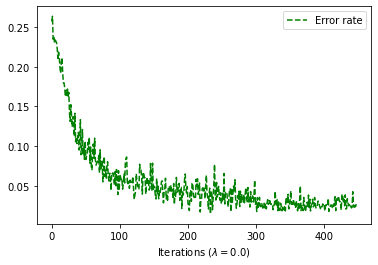

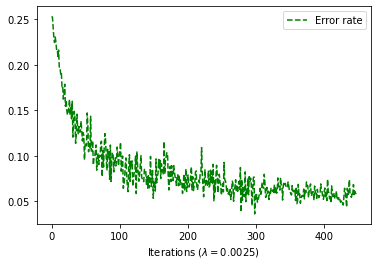

In [3]:

EPOCHS_in = 2
BATCH_SIZE_in = 200
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')


#without regularisation

lambdavar=0.

model_no_reg = W2Rmisc.ResNet_18_for_MNIST_srt().to(DEVICE)

print('Run training - without reg')
Lists_Results=W2Rcore.W2R_fit(model_no_reg,X_train,y_train, S_train, lambdavar, EPOCHS = EPOCHS_in, BATCH_SIZE = BATCH_SIZE_in,obs_for_histo=50,DistBetween='All_predictions',DEVICE=DEVICE)

plt.figure()
plt.plot(Lists_Results['Acc'],'g--',label='Error rate')
#plt.plot(lambdavar*np.array(Lists_Results['W2']),'r-',label='$\lambda$*W2')
plt.xlabel('Iterations ($\lambda=$'+str(lambdavar)+')')
plt.legend()
plt.savefig('Convergence_'+str(lambdavar)+'_noreg.pdf')

#with regularisation

lambdavar=0.0025

model_reg = W2Rmisc.ResNet_18_for_MNIST_srt().to(DEVICE)

print('Run training - with reg')
Lists_Results=W2Rcore.W2R_fit(model_reg,X_train,y_train, S_train, lambdavar, EPOCHS = EPOCHS_in, BATCH_SIZE = BATCH_SIZE_in,obs_for_histo=50,DistBetween='All_predictions',DEVICE=DEVICE)

plt.figure()
plt.plot(Lists_Results['Acc'],'g--',label='Error rate')
#plt.plot(lambdavar*np.array(Lists_Results['W2']),'r-',label='$\lambda$*W2')
plt.xlabel('Iterations ($\lambda=$'+str(lambdavar)+')')
plt.legend()
plt.savefig('Convergence_'+str(lambdavar)+'_reg.pdf')




**Tests - without regularisation**

In [4]:

predY_test=torch.clone(W2Rcore.LargeDatasetPred(model_no_reg,X_test.float(),10000,DEVICE=DEVICE))  #prediction made with blocks of 10000 observations to make sure we won't saturate the memory
    
error = nn.MSELoss()  #does not take into account the W2 metric
loss = error(predY_test, y_test.float())
    
tmp_loss=loss.data
print('Loss (test data): '+str(tmp_loss))
            
y_pred_np=1*(predY_test.view(-1).data.numpy()>0.5)
y_true_np=1*(y_test.view(-1).data.numpy()>0.5)
S_np=S_test[:]
    
tmp_DI=W2Rmisc.compute_disparate_impact(y_pred_np, S_np)
print('DI:',tmp_DI)
    
tmp_cm=W2Rmisc.cpt_BasicDescrStats(y_pred_np, y_true_np, S_np)
    
print('s0_RatioGoodPred:',tmp_cm['s0_RatioGoodPred'])
print('s1_RatioGoodPred:',tmp_cm['s1_RatioGoodPred'])


Loss (test data): tensor(0.0424)
DI: 0.8083534699445957
s0_RatioGoodPred: 0.8795759151830366
s1_RatioGoodPred: 0.9792041591681664


**Tests - with regularisation**

In [5]:

predY_test=torch.clone(W2Rcore.LargeDatasetPred(model_reg,X_test.float(),10000,DEVICE=DEVICE))  #prediction made with blocks of 10000 observations to make sure we won't saturate the memory
    
error = nn.MSELoss()  #does not take into account the W2 metric
loss = error(predY_test, y_test.float())
    
tmp_loss=loss.data
print('Loss (test data): '+str(tmp_loss))
            
y_pred_np=1*(predY_test.view(-1).data.numpy()>0.5)
y_true_np=1*(y_test.view(-1).data.numpy()>0.5)
S_np=S_test[:]
    
tmp_DI=W2Rmisc.compute_disparate_impact(y_pred_np, S_np)
print('DI:',tmp_DI)
    
tmp_cm=W2Rmisc.cpt_BasicDescrStats(y_pred_np, y_true_np, S_np)
    
print('s0_RatioGoodPred:',tmp_cm['s0_RatioGoodPred'])
print('s1_RatioGoodPred:',tmp_cm['s1_RatioGoodPred'])


Loss (test data): tensor(0.0607)
DI: 0.8704722903365264
s0_RatioGoodPred: 0.8797759551910382
s1_RatioGoodPred: 0.9462107578484303
